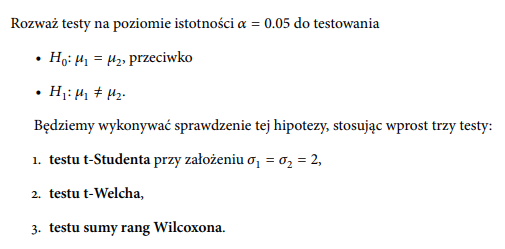

https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm

In [16]:
library(ggplot2)

In [40]:

options(repr.plot.width =13, repr.plot.height =6)


### przykładowe testy

In [18]:
freedom <- function(s1,s2,n1,n2) {
    (s1/n1 + s2/n2)^2/((s1/n1)^2/(n1-1) + (s2/n2)^2/(n2-1))
}

In [2]:
d <- 1
m1 <- 0
m2 <- m1 + d
alfa <- 0.05

X <- rnorm(100, m1, 2)
Y <- rnorm(200, m2, 4)

In [15]:
##test t studenta - var.equal=TRUE !!

X <- rnorm(100, m1, 2)
Y <- rnorm(200, m2, 2)

v <- t.test(X, Y, alternative = "two.sided", var.equal = TRUE)
T <- v$statistic
P <- v$p.value

abs(T) > qt(1-alfa/2, freedom(4,4,100,200))
P < alfa

t 
FALSE

[1] FALSE

In [21]:
## test welcha - var.equal=FALSE
w <- t.test(X, Y, alternative = "two.sided", var.equal = FALSE)
w



	Welch Two Sample t-test

data:  X and Y
t = -3.3302, df = 296.54, p-value = 0.0009777
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8823857 -0.4839674
sample estimates:
 mean of x  mean of y 
-0.1470869  1.0360896 


In [20]:
X <- rnorm(100, m1, 2)
Y <- rnorm(200, m2, 4)

v <- t.test(X, Y, alternative = "two.sided", var.equal = FALSE)
T <- v$statistic
P <- v$p.value

abs(T) > qt(1-alfa/2, freedom(4,16,100,200))
P < alfa

t 
TRUE

[1] TRUE

In [9]:
## wilcoxon 
c <- wilcox.test(X, Y)
c


	Wilcoxon rank sum test with continuity correction

data:  X and Y
W = 9474, p-value = 0.4581
alternative hypothesis: true location shift is not equal to 0


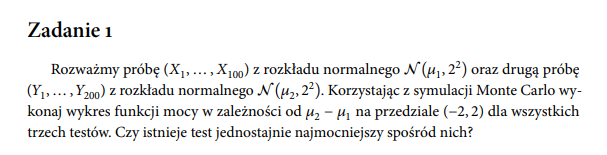

In [23]:
zad1 <- function(d, N=1000, s1=2, s2=2, a = 0.05) {
    X <- rnorm(100, 0, s1)
    Y <- rnorm(200, d, s2)
    welch <- t.test(X, Y, alternative = "two.sided", var.equal = FALSE)$p.value < a
    welch2 <- abs(t.test(X, Y, alternative = "two.sided", var.equal = FALSE)$statistic) > qt(1-alfa/2, freedom(s1, s2,100,200))
    ttest <- t.test(X, Y, alternative = "two.sided", var.equal = TRUE)$p.value < a
    ttest2 <- abs(t.test(X, Y, alternative = "two.sided", var.equal = TRUE)$statistic) > qt(1-alfa/2, freedom(s1, s2,100,200))
    wilcox <- wilcox.test(X, Y, alternative = "two.sided")$p.value < a
    c(ttest, welch, wilcox, ttest2, welch2)
}

In [24]:
d <- seq(-2,2,0.1)

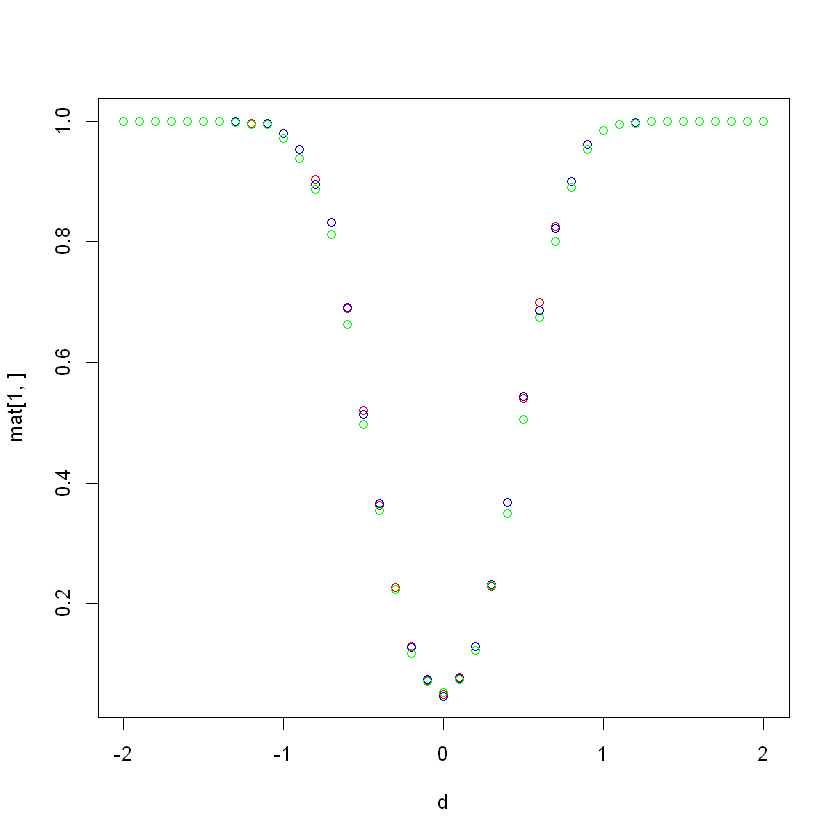

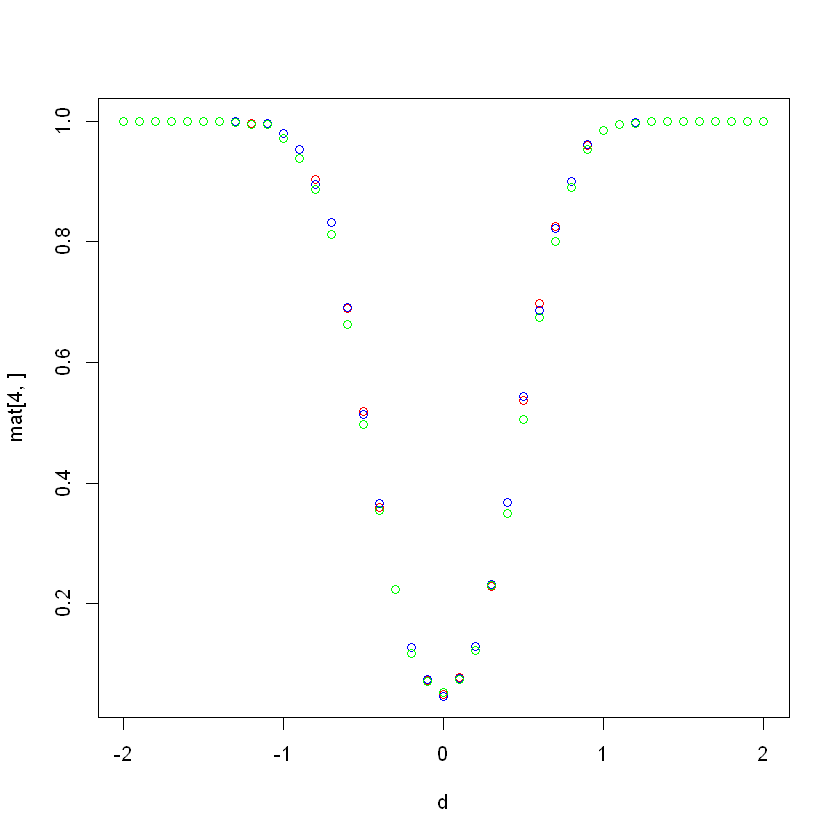

In [25]:
N <- 1000
v <-  sapply(d, zad1)

for (i in seq(1,N-1,1)) {
    v <- v + sapply(d, zad1)
}
mat <- v/N
plot(d, mat[1,], col="red")
points(d, mat[2,], col="blue")
points(d, mat[3,], col="green")

plot(d, mat[4,], col="red")
points(d, mat[5,], col="blue")
points(d, mat[3,], col="green")

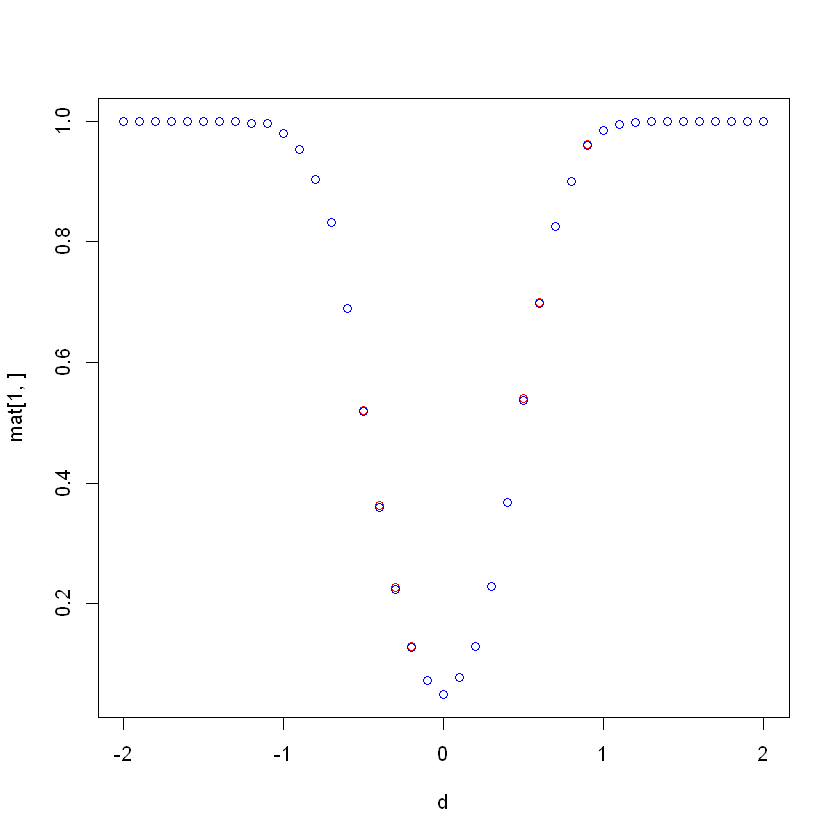

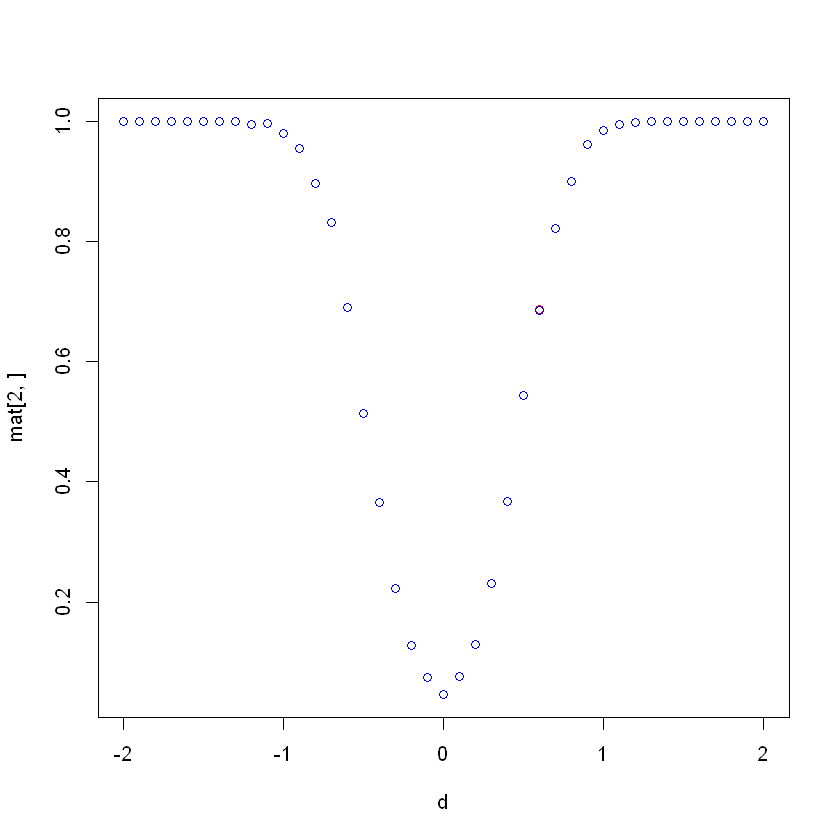

In [29]:
plot(d, mat[1,], col="red")
points(d, mat[4,], col="blue")

plot(d, mat[2,], col="red")
points(d, mat[5,], col="blue")

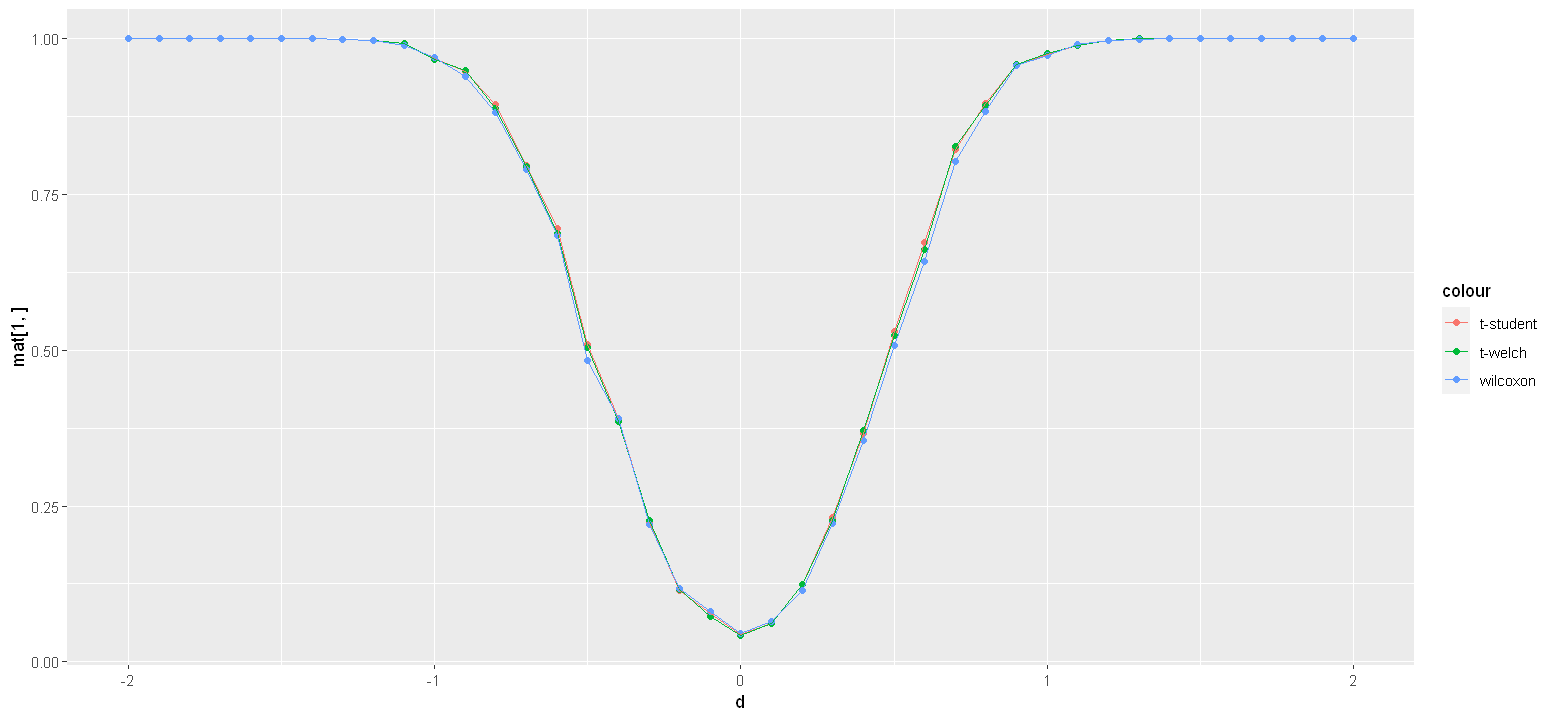

In [41]:
ggplot() + geom_point(aes(d, mat[1,], color="t-student")) +
 geom_point(aes(d, mat[2,], color="t-welch")) + geom_point(aes(d, mat[3,], color="wilcoxon")) + 
geom_line(aes(d, mat[1,], color="t-student")) +geom_line(aes(d, mat[2,], color="t-welch")) +
geom_line(aes(d, mat[3,], color="wilcoxon"))

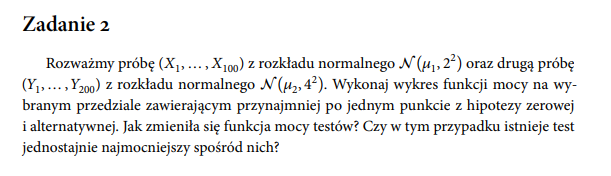

In [37]:
zad2 <- function(d, N=1000, s1=2, s2=4, a = 0.05) {
    X <- rnorm(100, 0, s1)
    Y <- rnorm(200, d, s2)
    welch <- t.test(X, Y, alternative = "two.sided", var.equal = FALSE)$p.value < a
    ttest <- t.test(X, Y, alternative = "two.sided", var.equal = TRUE)$p.value < a
    wilcox <- wilcox.test(X, Y, alternative = "two.sided")$p.value < a
    c(ttest, welch, wilcox)
}

In [38]:
N <- 1000
v2 <-  sapply(d, zad2)

for (i in seq(1,N-1,1)) {
    v2 <- v2 + sapply(d, zad2)
}
mat2 <- v2/N

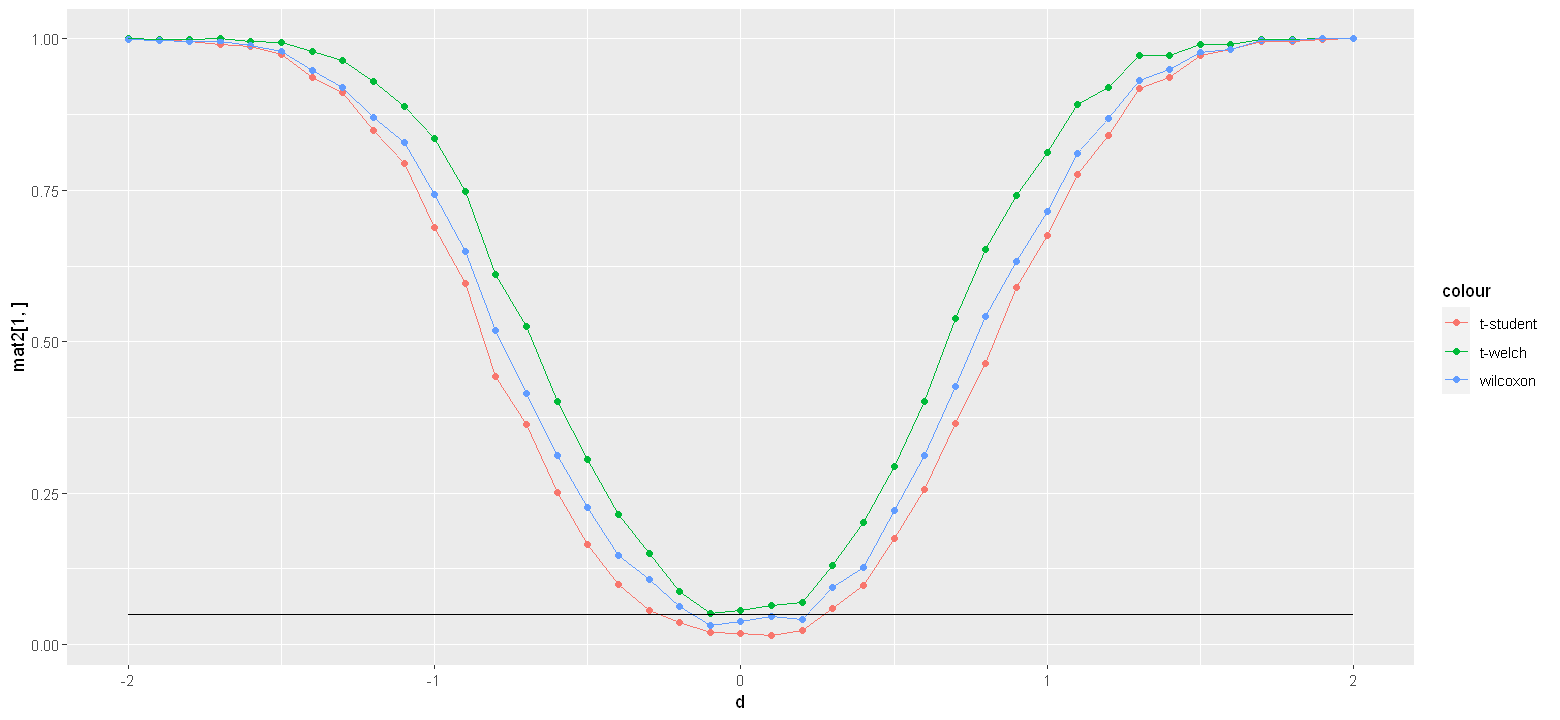

In [52]:
ggplot() + geom_point(aes(d, mat2[1,], color="t-student")) +
 geom_point(aes(d, mat2[2,], color="t-welch")) + geom_point(aes(d, mat2[3,], color="wilcoxon")) + 
geom_line(aes(d, mat2[1,], color="t-student")) +geom_line(aes(d, mat2[2,], color="t-welch")) +
geom_line(aes(d, mat2[3,], color="wilcoxon"))+geom_line(aes(d, rep(0.05, length(d))))

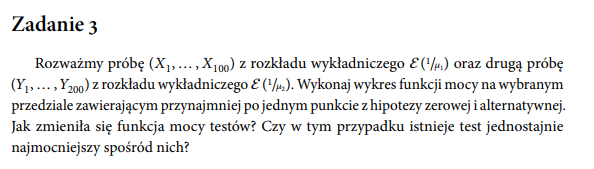

In [44]:
zad3 <- function(d, N=1000, a = 0.05) {
    X <- rexp(100, 1/2)
    Y <- rexp(200, 1/(2 + d))
    welch <- t.test(X, Y, alternative = "two.sided", var.equal = FALSE)$p.value < a
    ttest <- t.test(X, Y, alternative = "two.sided", var.equal = TRUE)$p.value < a
    wilcox <- wilcox.test(X, Y, alternative = "two.sided")$p.value < a
    c(ttest, welch, wilcox)
}

In [45]:
ds <- seq(-1.9,1.9, 0.1)
N <- 1000
v3 <-  sapply(d, zad3)

for (i in seq(1,N-1,1)) {
    v3 <- v3 + sapply(d, zad3)
}
mat3 <- v3/N

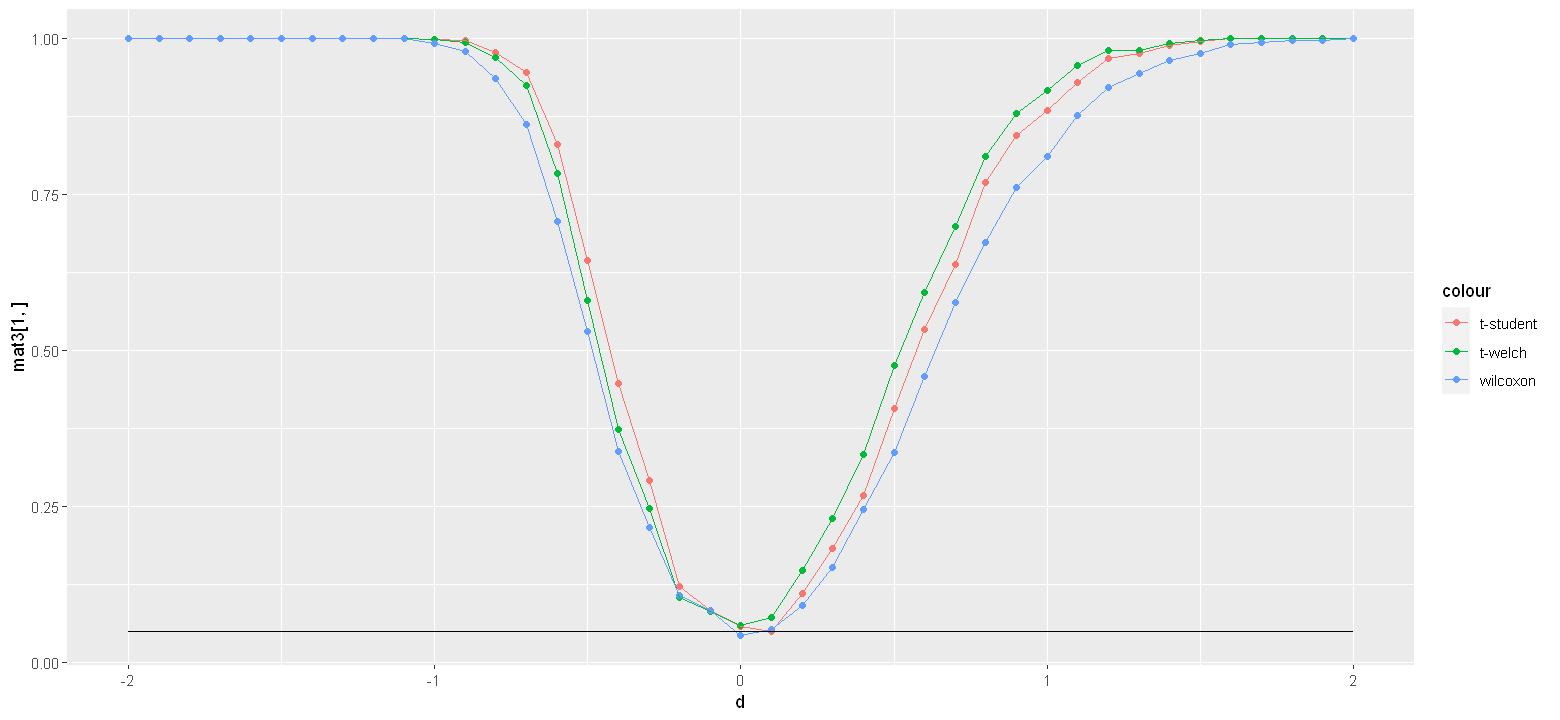

In [51]:
ggplot() + geom_point(aes(d, mat3[1,], color="t-student")) +
 geom_point(aes(d, mat3[2,], color="t-welch")) + geom_point(aes(d, mat3[3,], color="wilcoxon")) + 
geom_line(aes(d, mat3[1,], color="t-student")) +geom_line(aes(d, mat3[2,], color="t-welch")) +
geom_line(aes(d, mat3[3,], color="wilcoxon")) + geom_line(aes(d, rep(0.05, length(d))))